In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import csv
import numpy as np
import h5py
import matplotlib.pyplot as plt
import math
import h5py
import scipy.io as sio

In [3]:
def save_result(file_name, result):
    '''保存最终的预测结果
    input:  file_name(string):保存最终结果的文件名
            result(mat):最终的预测结果
    '''
    with open(file_name) as csvFile:
        rows = csv.reader(csvFile)
        with open("file3.csv",'w', newline='') as f:
            writer = csv.writer(f)
            for index,row in enumerate(rows):
                tmp_row = row
                if index >= 1:
                    # tmp_row[-1] = int(result[index-1,0])
                    tmp_row[-1] = int(result[index-1])
                writer.writerow(tmp_row)

In [4]:
def loadData(path):
    '''
        加载全部的训练样本和标签
    '''
    features = {}
    labels = {}
    with h5py.File(path, 'r') as f:
#         print(list(f.keys()))
        features = f['train_feat']
        labels = f['train_label']
        features = np.mat(features).T
        labels = np.mat(labels).T
        print(labels.shape)
        print(features.shape)
    return features,labels

In [5]:
def loadTestData(path):
    features = {}
    with h5py.File(path, 'r') as f:
#         print(list(f.keys()))
        features = f['test_feat']
        features = np.mat(features).T
        print(features.shape)
    return features

In [6]:
    file_train = "train_data.mat"
    file_test = 'test_data_raw.mat'
    file_out = 'submission_sample.csv'
    file_training_set = "training_set.mat"
    file_validation_set = "validation_set.mat"

In [7]:
print("------------------加载数据---------------")
training_feat, training_label = loadData(file_train)

------------------加载数据---------------
(76240, 1)
(76240, 6812)


In [8]:
print("------------------数据预处理---------------")
x_mean = training_feat.mean(axis=0)
x_std = training_feat.std(axis=0)
X = (training_feat-x_mean)/x_std

------------------数据预处理---------------


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, training_label, test_size=0.1, random_state=400)

In [ ]:
X_train_batch = X_train[0:5000,:]
y_train_batch = y_train[0:5000]
feat_n_list = list([40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200])
parameters = {'n_estimators':list([95]),'criterion':list(['gini']),'max_features':feat_n_list}
rfc = RandomForestClassifier()
gs = GridSearchCV(rfc, parameters,n_jobs =3,return_train_score =True,cv=3,refit=True)
gs.fit(X_train_batch,y_train_batch.ravel())


C:\Users\jiamoufang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [10]:
print(gs.get_params())

NameError: name 'gs' is not defined

In [64]:
print(gs.cv_results_ )

{'mean_fit_time': array([ 149.45199124,  149.56226428]), 'std_fit_time': array([ 7.20114909,  5.53552294]), 'mean_score_time': array([ 0.6680003 ,  0.63376546]), 'std_score_time': array([ 0.05158464,  0.07190362]), 'param_criterion': masked_array(data = ['gini' 'entropy'],
             mask = [False False],
       fill_value = ?)
, 'param_n_estimators': masked_array(data = [95 95],
             mask = [False False],
       fill_value = ?)
, 'params': [{'criterion': 'gini', 'n_estimators': 95}, {'criterion': 'entropy', 'n_estimators': 95}], 'split0_test_score': array([ 0.0955025 ,  0.08273182]), 'split1_test_score': array([ 0.0966967 ,  0.08768769]), 'split2_test_score': array([ 0.08604954,  0.09191656]), 'mean_test_score': array([ 0.093 ,  0.0872]), 'std_test_score': array([ 0.00465054,  0.0037544 ]), 'rank_test_score': array([1, 2]), 'split0_train_score': array([ 1.,  1.]), 'split1_train_score': array([ 1.,  1.]), 'split2_train_score': array([ 1.,  1.]), 'mean_train_score': array([ 1.

In [60]:
print(gs.best_estimator_ )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=95, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [61]:
print(gs.best_score_ )
print(gs.best_params_ )
scores = gs.cv_results_['mean_test_score']
scores_std = gs.cv_results_['std_test_score']

0.093
{'criterion': 'gini', 'n_estimators': 95}


In [63]:
scores

array([ 0.093 ,  0.0872])

In [62]:
gs.score(X_train_batch,y_train_batch)

1.0

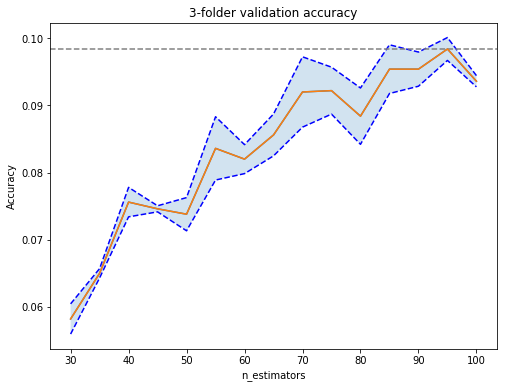

In [50]:
n_estimators = [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
plt.figure().set_size_inches(8, 6)
plt.plot(n_estimators, scores)
std_error = scores_std / np.sqrt(3)
plt.plot(n_estimators, scores + std_error, 'b--')
plt.plot(n_estimators, scores - std_error, 'b--')
# plt.plot(n_estimators,[ 0.0582,  0.065 ,  0.0756,  0.0746,  0.0738,  0.0836,  0.082 ,
#         0.0856,  0.092 ,  0.0922,  0.0884,  0.0954,  0.0954,  0.0984,
#         0.0936])
plt.fill_between(n_estimators, scores + std_error, scores - std_error, alpha=0.2)
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.plot(n_estimators,[ 0.0582,  0.065 ,  0.0756,  0.0746,  0.0738,  0.0836,  0.082 ,
        0.0856,  0.092 ,  0.0922,  0.0884,  0.0954,  0.0954,  0.0984,
        0.0936])
plt.title('3-folder validation accuracy')
plt.xlabel('n_estimators'),plt.ylabel('Accuracy')
plt.show()

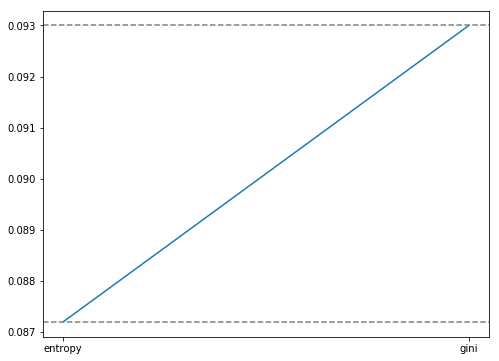

In [68]:
criterion = ['gini','entropy']
plt.figure().set_size_inches(8, 6)
plt.plot(criterion,scores)
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.axhline(np.min(scores), linestyle='--', color='.5')
plt.show()

In [ ]:
clf = RandomForestClassifier(n_estimators=40)
clf.fit(X_train_batch,y_train_batch)

In [ ]:
print(clf.feature_importances_)
